<a href="https://colab.research.google.com/github/Armin-Abdollahi/Signal-Processing/blob/main/Convert_signals_to_Mel_Scale_Spectrograms_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convert signal to Mel Scale Spectrograms images


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install --upgrade mne librosa

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 40.8 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import mne

In [5]:
# Load the EEG data
raw = mne.io.read_raw_gdf('/content/drive/MyDrive/BCI_Database/gdf/A1_CE_baseline.gdf', preload=True)

Extracting EDF parameters from /content/drive/MyDrive/BCI_Database/gdf/A1_CE_baseline.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
Fz, FCz, Cz, CPz, Pz, C1, C3, C5, C2, C4, C6, EOG1, EOG2, EOG3, EMGg, EMGd, F4, FC2, FC4, FC6, CP2, CP4, CP6, P4, F3, FC1, FC3, FC5, CP1, CP3, CP5, P3
Creating raw.info structure...
Reading 0 ... 95775  =      0.000 ...   187.061 secs...


In [6]:
# Pick EEG channels
raw.pick_types(meg=False, eeg=True, eog=False, exclude='bads')

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


<RawGDF | A1_CE_baseline.gdf, 32 x 95776 (187.1 s), ~23.4 MB, data loaded>

In [7]:
# Extract data and sampling frequency
data, times = raw[:]
fs = raw.info['sfreq']

In [8]:
# Select the data for a single channel, e.g., the first EEG channel
channel_data = data[0]

In [9]:
# Convert the signal to Mel-scale spectrogram
S = librosa.feature.melspectrogram(y=channel_data, sr=fs, n_mels=128, fmax=fs/2)

In [10]:
# Convert to log scale (dB)
S_dB = librosa.power_to_db(S, ref=np.max)

/usr/local/lib/python3.10/dist-packages/librosa/display.py:1255: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  if __same_axes(x_axis, y_axis, axes.get_xlim(), axes.get_ylim()) and auto_aspect:


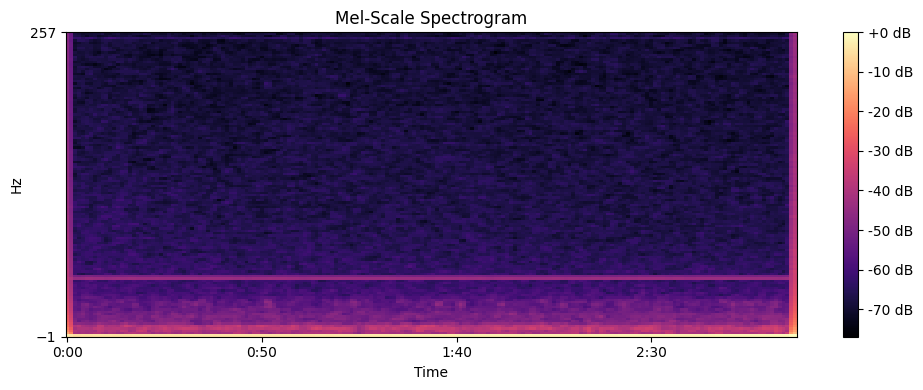

In [11]:
# Plot the Mel-scale spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_dB, sr=fs, x_axis='time', y_axis='mel', fmax=fs/2)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Scale Spectrogram')
plt.tight_layout()
plt.show()

### Using the librosa library to compute Mel Scale Spectrograms for all .gdf files in a specified folder and then saves the spectrograms as images to a specified output folder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install --upgrade mne

In [ ]:
pip install mne librosa matplotlib

In [ ]:
import os
import mne
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [ ]:
# Define the folder containing the .gdf files and the folder to save the spectrograms
input_folder_path = '/content/drive/MyDrive/BCI_Database/gdf'
output_folder_path = '/content/drive/MyDrive/BCI_Database/gdf/Mel_Spectrograms_Images'

In [ ]:
# Ensure the output folder exists
os.makedirs(output_folder_path, exist_ok=True)

In [ ]:
# Loop through all files in the input folder
for filename in os.listdir(input_folder_path):
    if filename.endswith('.gdf'):
        # Construct the full file path
        file_path = os.path.join(input_folder_path, filename)

        # Load the .gdf file
        raw = mne.io.read_raw_gdf(file_path, preload=True)

        # Extract data from the raw object
        data = raw.get_data()
        sfreq = raw.info['sfreq']

        # Loop through each channel in the data
        for i, channel_data in enumerate(data):
            # Compute the Mel spectrogram
            S = librosa.feature.melspectrogram(y=channel_data, sr=sfreq, n_fft=2048, hop_length=512, n_mels=128)
            S_dB = librosa.power_to_db(S, ref=np.max)

            # Plot the Mel spectrogram
            plt.figure(figsize=(10, 4))
            librosa.display.specshow(S_dB, sr=sfreq, hop_length=512, x_axis='time', y_axis='mel')
            plt.colorbar(format='%+2.0f dB')
            plt.title(f'Mel Spectrogram - {filename} - Channel {i}')

            # Save the plot as an image
            spectrogram_file_path = os.path.join(output_folder_path, f'mel_spectrogram_{filename}_channel_{i}.png')
            plt.savefig(spectrogram_file_path)
            plt.close()

        print(f'Mel spectrograms created and saved for {filename} in {output_folder_path}')

print('Mel spectrogram creation complete for all .gdf files in the folder.')